# Matplotlib-Scipy-Pandas-Learning material

This material is a short excerpt from **Introduction to Data Science** in Tsinghua University. Please study on your own.

# Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

By running this special iPython command, we will be displaying plots inline in **svg** format:

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Plotting

### Plot
The **most frequently used** function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

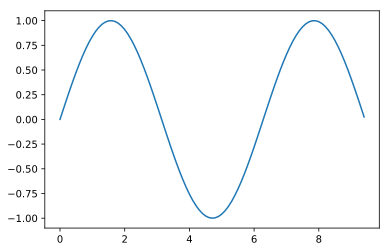

In [6]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

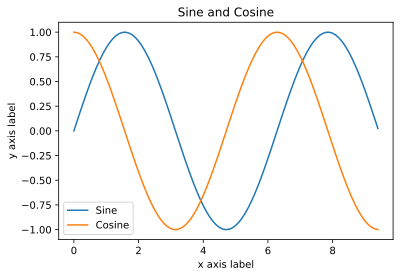

In [7]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Scatter
BTW, we could plot scatters with adjustable size and transparency.

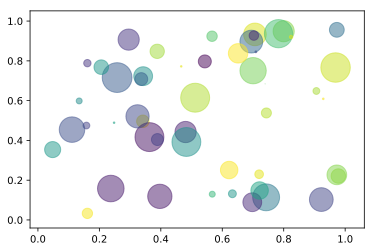

In [8]:
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

### Contour
Draw contour using 3d data

Text(0.5,1,'Simplest default with labels')

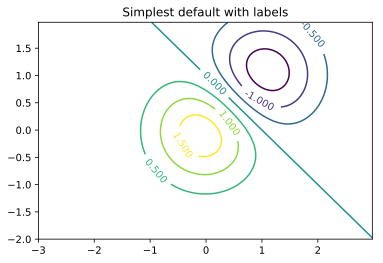

In [9]:
import matplotlib.cm as cm

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

### Bar
Supports bar chart definitely.

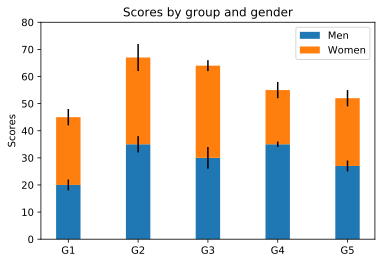

In [10]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

### Histogram
How to plot a histogram?

In other words, where should we start to **estimate the distribution** given some data?

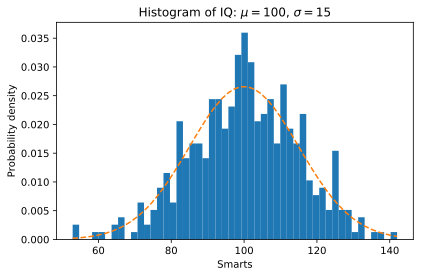

In [11]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

### Two-dimensional Histogram
What about 2d histogram?

C:\Users\64312\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


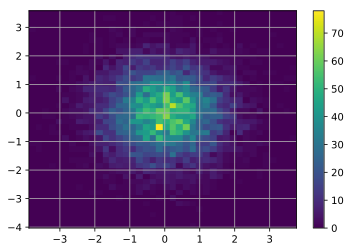

In [12]:
mean = [0,0]
cov = [[0,1],[1,0]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x, y, bins=40)
plt.colorbar()
plt.grid()
plt.show()

### "Heatmap"
What about **heatmap**, e.g. a matrix's value?

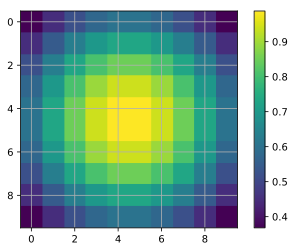

In [13]:
# mat = np.random.rand(10, 10)

# 2d gaussian
x, y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
d = np.sqrt(x*x+y*y)
sigma, mu = 1.0, 0.0
mat = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )

plt.imshow(mat)
plt.grid(True)
plt.colorbar()
plt.show()

### Pie
So does pie chart.

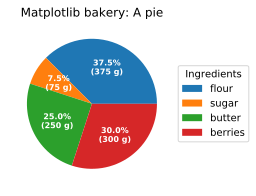

In [14]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

## Subplots 

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

You can plot different things in the same figure using the subplot function. Here is an example:

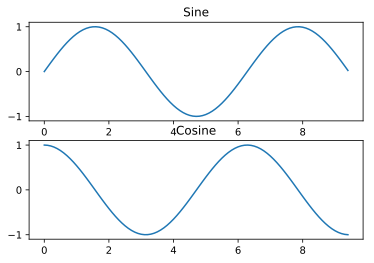

In [15]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

## Get tired of memorizing all the APIs?

Check [this](https://matplotlib.org/tutorials/introductory/sample_plots.html) out!

# SciPy

Numpy provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays. SciPy builds on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications.

The best way to get familiar with SciPy is to browse the documentation. We will highlight some examples to show the basic operation of SciPy.

## Image operations

SciPy provides some basic functions to work with images. For example, it has functions to read images from disk into numpy arrays, to write numpy arrays to disk as images, and to resize images. Here is a simple example that showcases these functions:

In [16]:
from PIL import Image
import numpy as np
from scipy.ndimage import filters
from matplotlib import pyplot as plt
from scipy.misc import imread, imsave
from skimage.transform import resize

Text(0.5,1,'resize')

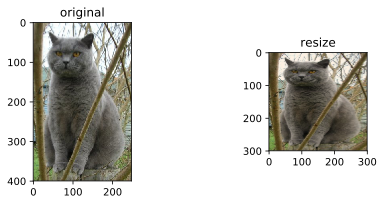

In [17]:
img = np.array(Image.open(u'cat.jpg').convert('RGB'))


img_tinted = img * [1, 0.95, 0.9]

# Resize the tinted image to be 300 by 300 pixels.
img_tinted = resize(img_tinted, (300, 300), mode='reflect').astype('uint8')

plt.subplot(1, 3, 1)
plt.imshow(img)

plt.title('original')

plt.subplot(1, 3, 3)
plt.imshow(img_tinted)
plt.title('resize')

## Signal Processing
1. Blurring image
2. Fast Fourier Transform
3. ...

Here is the processing of gaussian filter. It is easy for us to use Scipy package to manipulate different kinds of tools to deal with image.

Text(0.5,1,'gaussian(kernel 5)')

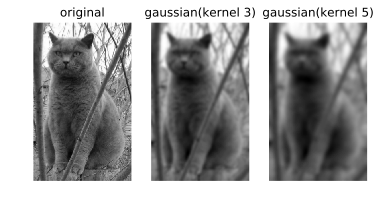

In [18]:
im = np.array(Image.open(u'cat.jpg').convert('L')) #convert to gray picture
im2 = filters.gaussian_filter(im,3)
im3 = filters.gaussian_filter(im,5)

plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(im,cmap='gray')
plt.title('original')

plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(im2,cmap='gray')
plt.title('gaussian(kernel 3)')

plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(im3,cmap='gray')
plt.title('gaussian(kernel 5)')

## Linear Algebra

1. Solving a set of equations
2. Determinants of Square Matrices
3. Inverse of a Square Matrix
4. Singular Value Decomposition
5. ...

In [19]:
from scipy import linalg

### Solve functions
Let's suppose this is the set of equations we want to solve:
$$
\begin{split}
2x + 3y = 7 \\
3x + 4y = 10
\end{split}
$$

In [20]:
A = np.array([[2, 3], [3, 4]])
B = np.array([[7], [10]])

linalg.solve(A, B)

array([[2.],
       [1.]])

### Determinant
To calculate the **determinant** for a <u>square matrix</u>, we can use the `det()` method.

In [21]:
mat = np.array([[8, 2], [1, 4]])
linalg.det(mat)

30.0

### Inverse Matrix
We use the `inv()` method to calculate the inverse of a <u>squared matrix</u>.

In [22]:
linalg.inv(mat)

array([[ 0.13333333, -0.06666667],
       [-0.03333333,  0.26666667]])

### Singular Value Decomposition
In order to perform sigular value decomposition, we simply use `svd()`.

In [23]:
linalg.svd(mat)

(array([[-0.9610057 , -0.27652857],
        [-0.27652857,  0.9610057 ]]),
 array([8.52079729, 3.52079729]),
 array([[-0.9347217 , -0.35538056],
        [-0.35538056,  0.9347217 ]]))

The more detail of SciPy can be found in [this page](https://docs.scipy.org/doc/scipy/reference/tutorial).

# Pandas

Let's manipulate **dataset** with _pandas_!

So what is the typical form of dataset?

## DataFrame

A **two-dimensional** labeled data structure with columns of **potentially different types**.

- Loading/Creation

- Observation

- Slicing/Indexing

    + Insertion
    
    + Deletion
    
    + Update

- Filtering

- Sorting

- ...

### Basics

In [24]:
import pandas as pd

# Read in the csv files
dfcars=pd.read_csv("mtcars.csv")
type(dfcars)

pandas.core.frame.DataFrame

In [29]:
dfcars.head(10)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


The first column is bothersome, how do we clean that up?

In [30]:
dfcars = dfcars.rename(columns={"Unnamed: 0": "name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


To access a column, you can use either **dictionary** syntax or **instance-variable** syntax.

In [31]:
# print(dfcars.mpg) # This sort of data is called Series.
# print (dfcars['mpg'])

print(dfcars.mpg.values) # You can get a numpy array of values frorm the Pandas Series.
print(type(dfcars.mpg.values))
# print(type(dfcars.mpg.values))

[21.  21.  22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2
 10.4 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.  30.4
 15.8 19.7 15.  21.4]
<class 'numpy.ndarray'>


Wanna take a look at the data distribution?

Text(0.5,1,'Miles per Gallon')

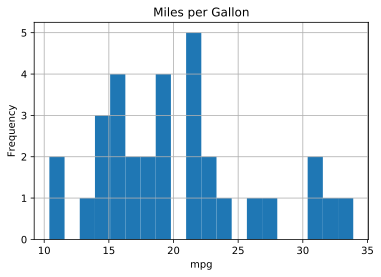

In [32]:
dfcars.mpg.hist(bins=20)
# plt.hist(dfcars.mpg.values, bins=20);
plt.xlabel('mpg')
plt.ylabel('Frequency')
plt.title('Miles per Gallon')

What if we want to extract a sub-dataframe?

In [33]:
dfcars[['am', 'mpg']]

,am,mpg
0,1,21.0
1,1,21.0
2,1,22.8
3,0,21.4
4,0,18.7
5,0,18.1
6,0,14.3
7,0,24.4
8,0,22.8
9,0,19.2


### Descriptive Statistics

Observe the dataset

In [34]:
print(dfcars.shape) # #items * #attributes

print(len(dfcars)) # the number of rows in the dataframe

print(dfcars.columns)

(32, 12)
32
Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')


In [35]:
dfcars.info() # including memory usage and counts of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
name    32 non-null object
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [36]:
dfcars.describe() # more statistical values

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### Slice and Filtering

In [37]:
new_index = np.arange(5, 37)
dfcars_reindex = dfcars.reindex(new_index)
dfcars_reindex.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,Valiant,18.1,6.0,225.0,105.0,2.76,3.46,20.22,1.0,0.0,3.0,1.0
6,Duster 360,14.3,8.0,360.0,245.0,3.21,3.57,15.84,0.0,0.0,3.0,4.0
7,Merc 240D,24.4,4.0,146.7,62.0,3.69,3.19,20.00,1.0,0.0,4.0,2.0
8,Merc 230,22.8,4.0,140.8,95.0,3.92,3.15,22.90,1.0,0.0,4.0,2.0
9,Merc 280,19.2,6.0,167.6,123.0,3.92,3.44,18.30,1.0,0.0,4.0,4.0


We now return the first three rows of dfcars_reindex in two different ways, first with iloc and then with loc.

In [38]:
dfcars_reindex.iloc[0:3]

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,Valiant,18.1,6.0,225.0,105.0,2.76,3.46,20.22,1.0,0.0,3.0,1.0
6,Duster 360,14.3,8.0,360.0,245.0,3.21,3.57,15.84,0.0,0.0,3.0,4.0
7,Merc 240D,24.4,4.0,146.7,62.0,3.69,3.19,20.00,1.0,0.0,4.0,2.0


Since iloc uses the position in the index. Notice that the argument 0:3 with iloc returns the first three rows of the dataframe, which have label names 5, 6, and 7. To access the same rows with loc, we write

In [39]:
dfcars_reindex.loc[5:7]

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,Valiant,18.1,6.0,225.0,105.0,2.76,3.46,20.22,1.0,0.0,3.0,1.0
6,Duster 360,14.3,8.0,360.0,245.0,3.21,3.57,15.84,0.0,0.0,3.0,4.0
7,Merc 240D,24.4,4.0,146.7,62.0,3.69,3.19,20.00,1.0,0.0,4.0,2.0


What if we want to slice both row and column?

In [40]:
dfcars_reindex.iloc[2:5, 1:4]
# dfcars_reindex.loc[7:9, 'mpg':'disp']

,mpg,cyl,disp
7,24.4,4.0,146.7
8,22.8,4.0,140.8
9,19.2,6.0,167.6


Usually, we are more intersted in entries meeting some requirements.

Let's do filter by **condition**!

In [61]:
df1 = dfcars[(dfcars['name'].str.startswith('T')) & (dfcars['hp'] <= 100)]
df1.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1


### Sorting

In [62]:
# dfcars.sort_values('mpg', ascending=False)
dfcars.sort_index(axis=1, ascending=True)

,am,carb,cyl,disp,drat,gear,hp,mpg,name,qsec,vs,wt
0,1,4,6,160.0,3.90,4,110,21.0,Mazda RX4,16.46,0,2.620
1,1,4,6,160.0,3.90,4,110,21.0,Mazda RX4 Wag,17.02,0,2.875
2,1,1,4,108.0,3.85,4,93,22.8,Datsun 710,18.61,1,2.320
3,0,1,6,258.0,3.08,3,110,21.4,Hornet 4 Drive,19.44,1,3.215
4,0,2,8,360.0,3.15,3,175,18.7,Hornet Sportabout,17.02,0,3.440
5,0,1,6,225.0,2.76,3,105,18.1,Valiant,20.22,1,3.460
6,0,4,8,360.0,3.21,3,245,14.3,Duster 360,15.84,0,3.570
7,0,2,4,146.7,3.69,4,62,24.4,Merc 240D,20.00,1,3.190
8,0,2,4,140.8,3.92,4,95,22.8,Merc 230,22.90,1,3.150
9,0,4,6,167.6,3.92,4,123,19.2,Merc 280,18.30,1,3.440


### Update

- Update a grid
- Update a column
- ...

In [63]:
dfcars.head()
dfcars.iloc[0, 0] = 'Good Car'
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Good Car,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [64]:
print(dfcars.head())
dfcars.cyl -= 1
dfcars.head()

                name   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0           Good Car  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Good Car,21.0,5,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,5,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,3,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,5,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,7,360.0,175,3.15,3.440,17.02,0,0,3,2


### Insertion and Deletion

In [65]:
dfcars['like'] = 'yes'
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,like
0,Good Car,21.0,5,160.0,110,3.90,2.620,16.46,0,1,4,4,yes
1,Mazda RX4 Wag,21.0,5,160.0,110,3.90,2.875,17.02,0,1,4,4,yes
2,Datsun 710,22.8,3,108.0,93,3.85,2.320,18.61,1,1,4,1,yes
3,Hornet 4 Drive,21.4,5,258.0,110,3.08,3.215,19.44,1,0,3,1,yes
4,Hornet Sportabout,18.7,7,360.0,175,3.15,3.440,17.02,0,0,3,2,yes


In [66]:
dfcars.drop(columns=['disp', 'hp']) # this does not modify DataFrame inplace

,name,mpg,cyl,drat,wt,qsec,vs,am,gear,carb,like
0,Good Car,21.0,5,3.90,2.620,16.46,0,1,4,4,yes
1,Mazda RX4 Wag,21.0,5,3.90,2.875,17.02,0,1,4,4,yes
2,Datsun 710,22.8,3,3.85,2.320,18.61,1,1,4,1,yes
3,Hornet 4 Drive,21.4,5,3.08,3.215,19.44,1,0,3,1,yes
4,Hornet Sportabout,18.7,7,3.15,3.440,17.02,0,0,3,2,yes
5,Valiant,18.1,5,2.76,3.460,20.22,1,0,3,1,yes
6,Duster 360,14.3,7,3.21,3.570,15.84,0,0,3,4,yes
7,Merc 240D,24.4,3,3.69,3.190,20.00,1,0,4,2,yes
8,Merc 230,22.8,3,3.92,3.150,22.90,1,0,4,2,yes
9,Merc 280,19.2,5,3.92,3.440,18.30,1,0,4,4,yes


In [67]:
dfcars.loc['inserted'] = ('My Car', 22., 1, 329.0, 10., 3.2, 2.3, 21.2, 0, 1, 3, 1, 'no')
dfcars.tail()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,like
28,Ford Pantera L,15.8,7,351.0,264.0,4.22,3.17,14.5,0,1,5,4,yes
29,Ferrari Dino,19.7,5,145.0,175.0,3.62,2.77,15.5,0,1,5,6,yes
30,Maserati Bora,15.0,7,301.0,335.0,3.54,3.57,14.6,0,1,5,8,yes
31,Volvo 142E,21.4,3,121.0,109.0,4.11,2.78,18.6,1,1,4,2,yes
inserted,My Car,22.0,1,329.0,10.0,3.20,2.30,21.2,0,1,3,1,no


In [68]:
dfcars.drop(index='inserted', inplace=True) # the line added just now is deleted this time
dfcars.tail()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,like
27,Lotus Europa,30.4,3,95.1,113.0,3.77,1.513,16.9,1,1,5,2,yes
28,Ford Pantera L,15.8,7,351.0,264.0,4.22,3.170,14.5,0,1,5,4,yes
29,Ferrari Dino,19.7,5,145.0,175.0,3.62,2.770,15.5,0,1,5,6,yes
30,Maserati Bora,15.0,7,301.0,335.0,3.54,3.570,14.6,0,1,5,8,yes
31,Volvo 142E,21.4,3,121.0,109.0,4.11,2.780,18.6,1,1,4,2,yes


# References


**Python Basics**

- [Python tutorial in Chinese by Xuefeng Liao(廖雪峰)](https://www.liaoxuefeng.com/wiki/0014316089557264a6b348958f449949df42a6d3a2e542c000)

- [Style guides for Google-originated open-source projects](https://zh-google-styleguide.readthedocs.io/en/latest/google-python-styleguide/)

**Modules**

- [Numpy User Guide](https://docs.scipy.org/doc/numpy/user/index.html)

- [Matplotlib Overview](https://matplotlib.org/contents.html)

- [Scipy User Guide](https://www.scipy.org/getting-started.html)

- [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/)

- [Jupyter Notebook Tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)

**Courses**

- [Foundations of Data Science@Berkeley](https://data.berkeley.edu/education/courses/data-8)

- [Python for Data Science@Berkeley](https://datascience.berkeley.edu/academics/curriculum/python-for-data-science/)

**Booklets**

- [Cheatsheet for Data Science](https://www.datacamp.com/community/data-science-cheatsheets?page=3)

- [Sample plots in Matplotlib](https://matplotlib.org/tutorials/introductory/sample_plots.html)

- [Data Fair](https://data-flair.training/blogs/)
    + This is a brief but delightful tutorial covering python, big data systems, ...

- [STA-663-2017](http://people.duke.edu/~ccc14/sta-663-2017/#)
    + This is a rather shorter tutorial, mainly focused on **statistical** related tools

**Books for later study**

- [Effective Python](https://effectivepython.com/)